In [332]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import seaborn as sb
from scipy import stats

%matplotlib inline

In [316]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# ESG 10 Year Monte Carlo

In [248]:
tickers1 = ['GCCHX', 'SPYX', 'ESGD']
tickers2 = ['CTEC', 'CRBN', 'EFAX']
tickers3 = ['ETHO', 'FAN']

# These are the tickers we discussed that have data that can be pulled from Alapaca. I havent tried other API's yet. 
tickersfin = ['SPYX', 'ESGD', 'CRBN', 'EFAX', 'ETHO', 'FAN']

timeframe = "1D"

# Pulling just a year for now to ensure they have usable data: 
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# Ignore 
esg_data1 = api.get_barset(
    tickers1,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data2 = api.get_barset(
    tickers2,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data3 = api.get_barset(
    tickers3,
    timeframe,
    start=start_date,
    end=end_date
).df

# Here is the API call for the working tickers: 
esg_datafin = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date,
    end=end_date
).df



# esg_data1.tail(10)
esg_datafin.tail(10)


CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2020-12-31 00:00:00-05:00  148.79  149.1200  148.4344  148.8900  11051.0   
2021-01-04 00:00:00-05:00  150.57  150.5700  147.3300  148.2600  22735.0   
2021-01-05 00:00:00-05:00  148.31  149.9300  148.3100  149.7400  18455.0   
2021-01-06 00:00:00-05:00  149.04  151.6100  148.9950  150.3299   8590.0   
2021-01-07 00:00:00-05:00  151.03  152.2400  151.0300  152.2400  10608.0   
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                     ...  \
                             open    high      low    close   volume  ...   
time                                                                  ...   
2020-12-31 00:00:00-05:00  78.250  78.250  77.8541  77.9700   2813.0  ...   
2021-01-04 00:00:00-05:00  79.320  79.320  77.9600  78.3900  14051.0  ...   
2021-01-05 00:00:00-05:00  78.660  79.108  78.4300  79.0800  10190.0  ...   
2021-01-06 00:00:00-05:00  79.320  79.790  79.3200  79.7000   6864.0  ...   
2021-01-07 00:00:00-05:00  79.230  79.780  79.2300  79.7800   5894.0  ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.8800  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.9000  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.0300  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.3000  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.5400  80.2680  11677.0  ...   

                             FAN                                       SPYX  \
                            open     high      low   close    volume   open   
time                                                                          
2020-12-31 00:00:00-05:00  23.38  23.3900  23.2200  23.300  133095.0  92.44   
2021-01-04 00:00:00-05:00  24.10  24.1700  23.8104  23.920  640086.0  93.28   
2021-01-05 00:00:00-05:00  24.01  24.1900  23.9501  24.165  443523.0  91.36   
2021-01-06 00:00:00-05:00  24.83  25.3700  24.6500  25.080  716286.0  91.36   
2021-01-07 00:00:00-05:00  25.80  26.0350  25.6845  26.015  676909.0  93.49   
2021-01-08 00:00:00-05:00  26.00  26.1400  25.7300  25.970  590216.0  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.1500  25.470  481884.0  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.9100  25.030  539505.0  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.1000  25.100  373769.0  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.8000  24.850  585176.0  94.17   

                                                           
                            high      low  close   volume  
time                                                       
2020-12-31 00:00:00-05:00  93.03  92.2200  93.02  14577.0  
2021-01-04 00:00:00-05:00  93.28  90.6400  91.51  40657.0  
2021-01-05 00:00:00-05:00  92.21  91.3600  92.05  21952.0  
2021-01-06 00:00:00-05:00  93.29  91.3600  92.52  32379.0  
2021-01-07 00:00:00-05:00  93.99  93.2500  93.84  37666.0  
2021-01-08 00:00:00-05:00  94.25  93.3133  94.20  28302.0  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.73  38854.0  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.65  15194.0  
2021-01-13 00:00:00-05:00  94.06  93.4100  93.83  17488.0  
2021-01-14 00:00:00-05:00  94.17  93.3696  93.44  20680.0  

[10 rows x 30 columns]

In [249]:
# Basic data 
esg_datafin.describe()

CRBN                                                    \
             open        high         low       close        volume   
count  929.000000  929.000000  929.000000  929.000000  9.290000e+02   
mean   119.013762  119.752519  118.256489  119.227713  1.440453e+04   
std     10.652911    9.781544   12.052323    9.885544  5.954382e+04   
min      0.000000   91.000000    0.000000   89.440000  1.870000e+02   
25%    112.660000  113.700000  111.990000  113.070000  5.022000e+03   
50%    117.780000  118.344200  117.380000  117.950000  7.235000e+03   
75%    122.870000  123.320000  122.480000  122.948800  1.279700e+04   
max    153.090000  153.478400  152.520000  153.340000  1.720440e+06   

             EFAX                                                     ...  \
             open        high         low       close         volume  ...   
count  878.000000  878.000000  878.000000  878.000000     878.000000  ...   
mean    68.648145   68.999758   68.409244   68.838281    4250.956720  ...   
std      5.693006    4.618462    6.147550    4.651630   11632.395148  ...   
min      0.000000   49.970000    0.000000   49.250000       1.000000  ...   
25%     66.347500   66.440925   66.240000   66.343000     620.000000  ...   
50%     69.385000   69.570000   69.242500   69.412500    1375.500000  ...   
75%     71.774500   72.017500   71.653225   71.924525    3440.750000  ...   
max     80.225000   80.380000   79.880000   80.300000  180001.000000  ...   

              FAN                                                    \
             open        high         low       close        volume   
count  931.000000  931.000000  931.000000  931.000000  9.310000e+02   
mean    13.970208   14.029048   13.888775   13.967938  6.790991e+04   
std      2.369701    2.382852    2.398195    2.372160  1.287429e+05   
min     10.580000   10.590000    0.000000   10.230000  6.600000e+02   
25%     12.820000   12.880000   12.770200   12.830000  1.526950e+04   
50%     13.244000   13.289900   13.200000   13.240000  2.735800e+04   
75%     13.985000   14.030000   13.915000   13.980000  6.137650e+04   
max     26.000000   26.140000   25.730000   26.015000  2.241606e+06   

             SPYX                                                    
             open        high         low       close        volume  
count  930.000000  930.000000  930.000000  930.000000     930.00000  
mean    70.507584   70.963874   69.983638   70.554296   23044.64086  
std      9.096652    8.531227    9.330029    8.470279   35072.79512  
min      0.000000   57.130000    0.000000   55.585000     165.00000  
25%     64.731050   65.000000   64.176250   64.670050    5925.75000  
50%     69.115000   69.310000   68.537200   68.895000   11602.00000  
75%     75.307500   75.862600   74.865000   75.235000   25453.50000  
max     94.250000   94.250000   93.410000   94.200000  449801.00000  

[8 rows x 30 columns]

In [250]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast ten years daily returns
MC_Sim_10 = MCSimulation(
    portfolio_data = esg_datafin,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [251]:
MC_Sim_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006705,1.002372,0.999664,0.998367,0.991414,0.996695,1.003922,0.998395,1.003313,0.999091,...,0.998584,0.997146,1.008806,0.999820,1.004163,0.997883,1.004817,0.992989,1.002739,1.007583
2,1.005680,1.006286,1.001419,0.998705,0.992839,1.010247,1.014697,1.002483,1.002407,1.007991,...,1.007164,0.995833,1.009784,0.991159,0.995159,1.003746,1.001079,0.995187,1.004024,1.001976
3,1.004455,1.006487,1.004374,1.004278,0.987538,1.004323,1.018028,0.999584,1.000927,1.009110,...,1.005154,0.999181,1.006976,0.994026,0.984054,1.011055,0.998287,0.994933,1.004001,1.013734
4,1.010718,0.995707,1.008409,1.002364,0.982335,1.001938,1.017495,1.002538,1.004099,1.009729,...,1.013988,0.998805,1.010156,0.997011,0.989597,1.008988,0.992692,0.994474,1.003865,1.017847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.262029,3.514892,3.156683,2.247392,3.678889,2.833141,4.217991,7.069975,2.908788,3.758127,...,4.326677,3.435456,4.685444,3.695346,2.493022,6.755823,3.062767,3.447752,4.102804,3.965942
2517,3.269577,3.509659,3.148853,2.256868,3.701624,2.847077,4.235145,7.048328,2.924985,3.760974,...,4.316084,3.440645,4.644299,3.696763,2.492541,6.764806,3.046476,3.433100,4.107081,3.933230
2518,3.234987,3.485556,3.164705,2.260131,3.723752,2.848459,4.247112,7.036703,2.914074,3.757099,...,4.329416,3.427703,4.633261,3.658815,2.479875,6.821426,3.058681,3.442454,4.133360,3.971601
2519,3.261857,3.481394,3.181245,2.252359,3.735399,2.854392,4.244573,7.027288,2.929371,3.727537,...,4.336416,3.444713,4.672808,3.676334,2.474247,6.796439,3.027814,3.441827,4.094745,3.962948


In [252]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_Sim_10.simulated_return.mean(axis=1)),
    "median": list(MC_Sim_10.simulated_return.median(axis=1)),
    "min": list(MC_Sim_10.simulated_return.min(axis=1)),
    "max": list(MC_Sim_10.simulated_return.max(axis=1)),
    "std": list(MC_Sim_10.simulated_return.std(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_10 = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns_10.head()

,mean,median,min,max,std
0,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.000910,1.000794,0.977153,1.016194,0.005315
2,1.001223,1.001134,0.976531,1.025114,0.007677
3,1.001909,1.002238,0.968695,1.029158,0.009545
4,1.002659,1.003323,0.959978,1.038579,0.010794


<AxesSubplot:title={'center':'Simulated Daily Returns of Portfolio Over 10 Years'}>

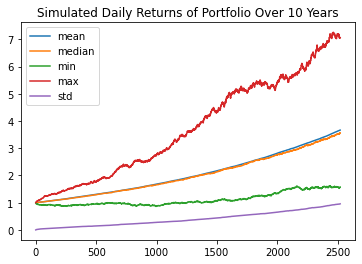

In [253]:
#Plot daily returns over 10 year period

df_simulated_returns_10.plot(title="Simulated Daily Returns of Portfolio Over 10 Years")



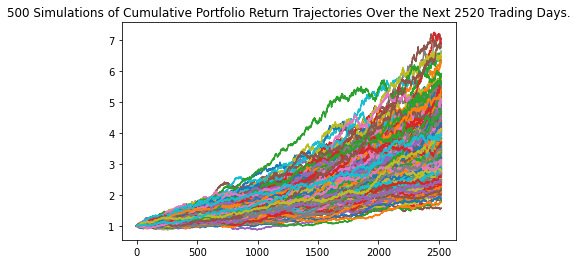

In [254]:
 # Plot simulation outcomes
line_plot = MC_Sim_10.plot_simulation()

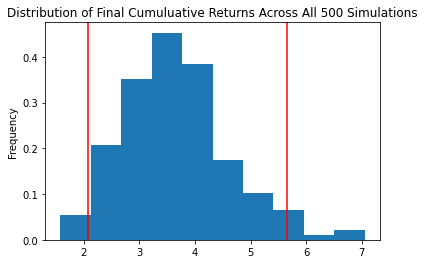

In [255]:
#Plot distriubtion of cum returns
dist_plot = MC_Sim_10.plot_distribution()

In [256]:
sim_10_table = MC_Sim_10.summarize_cumulative_return()

print(sim_10_table)

count           500.000000
mean              3.665229
std               0.957869
min               1.575479
25%               2.960628
50%               3.561046
75%               4.212501
max               7.054491
95% CI Lower      2.082372
95% CI Upper      5.654352
Name: 2520, dtype: float64


In [257]:
Sim_10_lower = round(sim_10_table[8]*10000,2)
Sim_10_upper = round(sim_10_table[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${Sim_10_lower} and ${Sim_10_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $20823.72 and $56543.52.


# ESG 10 Year Portfolio Returns, Risk

In [258]:
#Organize data and clean
esg_datafin.tail()

CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                   ...  \
                             open    high    low    close   volume  ...   
time                                                                ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.88  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.90  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.03  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.30  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.54  80.2680  11677.0  ...   

                             FAN                                    SPYX  \
                            open     high    low  close    volume   open   
time                                                                       
2021-01-08 00:00:00-05:00  26.00  26.1400  25.73  25.97  590216.0  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.15  25.47  481884.0  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.91  25.03  539505.0  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.10  25.10  373769.0  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.80  24.85  585176.0  94.17   

                                                           
                            high      low  close   volume  
time                                                       
2021-01-08 00:00:00-05:00  94.25  93.3133  94.20  28302.0  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.73  38854.0  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.65  15194.0  
2021-01-13 00:00:00-05:00  94.06  93.4100  93.83  17488.0  
2021-01-14 00:00:00-05:00  94.17  93.3696  93.44  20680.0  

[5 rows x 30 columns]

In [259]:
#Organize data for closing prices only
esg_closing_prices = pd.DataFrame()

esg_closing_prices["SPYX"] = esg_datafin["SPYX"]["close"]
esg_closing_prices["ESGD"] = esg_datafin["ESGD"]["close"]
esg_closing_prices["CRBN"] = esg_datafin["CRBN"]["close"]
esg_closing_prices["EFAX"] = esg_datafin["EFAX"]["close"]
esg_closing_prices["ETHO"] = esg_datafin["ETHO"]["close"]
esg_closing_prices["FAN"] = esg_datafin["FAN"]["close"]

esg_closing_prices.index = esg_closing_prices.index.date

esg_closing_prices.tail(10)



,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
2020-12-31,93.02,73.04,148.8900,77.9700,53.0600,23.300
2021-01-04,91.51,73.48,148.2600,78.3900,52.5500,23.920
2021-01-05,92.05,74.16,149.7400,79.0800,52.9100,24.165
2021-01-06,92.52,75.04,150.3299,79.7000,54.0413,25.080
2021-01-07,93.84,75.14,152.2400,79.7800,55.2321,26.015
2021-01-08,94.20,75.77,153.3400,80.3000,55.3800,25.970
2021-01-11,93.73,74.82,152.2499,79.4169,55.2001,25.470
2021-01-12,93.65,75.15,152.4160,79.5400,55.4300,25.030
2021-01-13,93.83,75.06,152.6800,79.4841,55.7180,25.100
2021-01-14,93.44,75.60,152.5200,80.2680,55.7100,24.850


In [260]:
esg_closing_prices.describe()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
count,930.000000,931.000000,929.000000,878.000000,927.000000,931.000000
mean,70.554296,64.499527,119.227713,68.838281,37.704943,13.967938
std,8.470279,4.182513,9.885544,4.651630,5.292035,2.372160
min,55.585000,46.330000,89.440000,49.250000,28.604400,10.230000
25%,64.670050,62.630000,113.070000,66.343000,34.011500,12.830000
50%,68.895000,64.550000,117.950000,69.412500,36.809100,13.240000
75%,75.235000,67.300000,122.948800,71.924525,40.605250,13.980000
max,94.200000,75.770000,153.340000,80.300000,55.718000,26.015000


<AxesSubplot:>

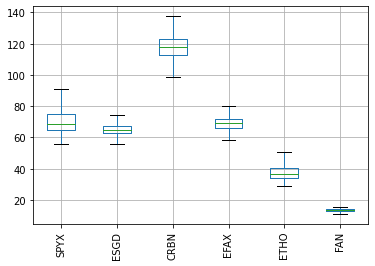

In [261]:
esg_closing_prices.boxplot(showfliers=False, rot=90)

In [262]:
esg_std = esg_closing_prices.std()
esg_std

SPYX    8.470279
ESGD    4.182513
CRBN    9.885544
EFAX    4.651630
ETHO    5.292035
FAN     2.372160
dtype: float64

<AxesSubplot:>

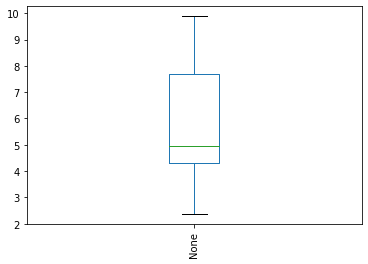

In [263]:
#Plot standard deviation of ESG closing prices ????
esg_std.plot(kind='box', showfliers=False, rot=90)

In [264]:
esg_correlation = esg_closing_prices.corr()
esg_correlation

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
SPYX,1.000000,0.341686,0.927405,0.288700,0.990497,0.824338
ESGD,0.341686,1.000000,0.661082,0.986711,0.376598,0.499445
CRBN,0.927405,0.661082,1.000000,0.617740,0.934236,0.876981
EFAX,0.288700,0.986711,0.617740,1.000000,0.317318,0.498978
ETHO,0.990497,0.376598,0.934236,0.317318,1.000000,0.835373
FAN,0.824338,0.499445,0.876981,0.498978,0.835373,1.000000


<AxesSubplot:>

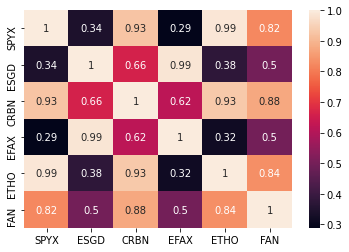

In [265]:
sb.heatmap(esg_correlation, annot=True)

In [266]:

#Annualized Standard Deviation
esg_closing_prices.std()/np.sqrt(252)

SPYX    0.533577
ESGD    0.263474
CRBN    0.622731
EFAX    0.293025
ETHO    0.333367
FAN     0.149432
dtype: float64

In [267]:
#Sharpe Ratio
esg_sharpe = (esg_daily_returns.mean() * 252) / (esg_daily_returns.std() * np.sqrt(252))
esg_sharpe

SPYX    0.720271
ESGD    0.367508
CRBN    0.553450
EFAX    0.182056
ETHO    0.818591
FAN     0.888364
dtype: float64

<AxesSubplot:>

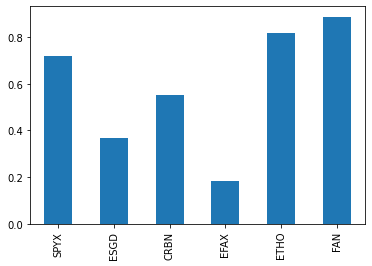

In [303]:
esg_sharpe.plot(kind='bar')

In [268]:
# ESG FUNDS Daily Returns
esg_daily_returns = (esg_closing_prices/esg_closing_prices.shift(1)) -1
esg_daily_returns

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,0.000969,0.010275,0.006383,NaN,-0.004685,0.012066
2017-05-08,0.000055,-0.006689,0.001213,NaN,-0.004707,-0.010432
2017-05-09,0.000183,-0.003665,0.000838,-0.013856,0.000676,-0.001506
2017-05-10,0.002755,0.001919,0.000653,-0.000588,0.016205,-0.001508
...,...,...,...,...,...,...
2021-01-08,0.003836,0.008384,0.007225,0.006518,0.002678,-0.001730
2021-01-11,-0.004989,-0.012538,-0.007109,-0.010998,-0.003248,-0.019253
2021-01-12,-0.000854,0.004411,0.001091,0.001550,0.004165,-0.017275
2021-01-13,0.001922,-0.001198,0.001732,-0.000703,0.005196,0.002797


<AxesSubplot:>

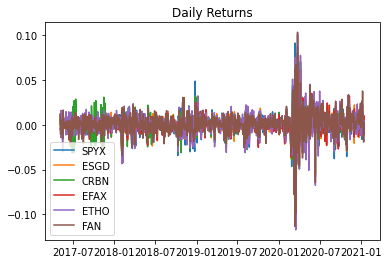

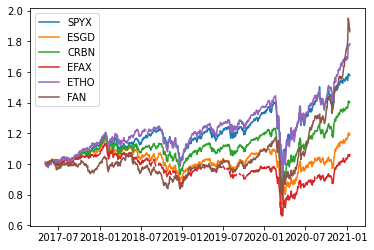

In [269]:
esg_daily_returns.plot(title='Daily Returns')

(esg_daily_returns+1).cumprod().plot()

<AxesSubplot:>

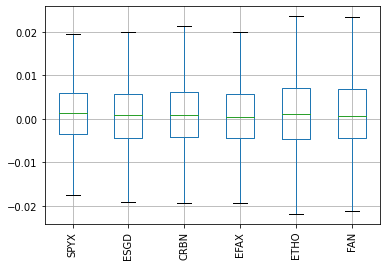

In [270]:
# Risk Analysis ESG Funds

esg_daily_returns.boxplot(showfliers=False, rot=90)


<AxesSubplot:>

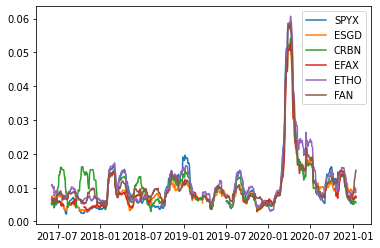

In [271]:
#Rolling Statistics 21 Day Window
esg_daily_returns.rolling(window=21).std().plot()

# SP500 Returns and Monte Carlo

In [272]:
sp500 = ['SPY']

timeframeSPY = "1D"

start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

sp500_data = api.get_barset(
    sp500,
    timeframeSPY,
    start=start_date,
    end=end_date
).df

sp500_data.tail()

SPY                                    
                             open    high       low   close    volume
time                                                                 
2021-01-08 00:00:00-05:00  380.59  381.49  377.1000  381.24  60275466
2021-01-11 00:00:00-05:00  377.85  380.58  377.7189  378.74  44814805
2021-01-12 00:00:00-05:00  378.89  379.86  376.3600  378.81  45364896
2021-01-13 00:00:00-05:00  378.69  380.86  377.8500  379.76  38355050
2021-01-14 00:00:00-05:00  380.59  381.13  378.1000  378.45  41045335

In [273]:
#sp500_data.describe()

sp500_closing_prices = pd.DataFrame()

sp500_closing_prices["SPY"] = sp500_data["SPY"]["close"]

sp500_closing_prices.index = sp500_data.index.date

sp500_closing_prices.tail(10)

,SPY
2020-12-31,373.85
2021-01-04,368.85
2021-01-05,371.32
2021-01-06,373.53
2021-01-07,379.06
2021-01-08,381.24
2021-01-11,378.74
2021-01-12,378.81
2021-01-13,379.76
2021-01-14,378.45


In [274]:
sp500_closing_prices.describe()

,SPY
count,932.000000
mean,288.271850
std,32.545228
min,222.510000
25%,265.520000
50%,282.765000
75%,306.385000
max,381.240000


In [275]:
# Annualized STD
sp500_closing_prices.std()/np.sqrt(252)

SPY    2.050157
dtype: float64

In [276]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_sp500 = MCSimulation(
    portfolio_data = sp500_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [277]:
MC_sp500.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992091,1.024784,1.000720,0.999622,0.991330,1.015437,1.009529,0.993478,1.005104,0.987169,...,0.985799,1.023374,0.987591,1.040635,1.012152,1.009632,1.004764,1.000696,1.008398,1.021157
2,1.013935,1.030196,0.995245,0.995366,1.000907,1.008889,1.003222,1.020046,1.006910,0.977214,...,0.989747,1.031107,0.988909,1.030811,0.984881,1.038242,0.995596,1.023551,1.022165,1.025616
3,1.036554,1.028336,1.002475,0.998097,0.970749,1.008558,1.027481,1.026078,1.007928,0.949256,...,0.980858,1.010824,0.985811,1.032942,0.978102,1.034175,0.986362,1.009759,1.005746,1.011623
4,1.017793,1.032929,1.022836,0.975675,0.974690,1.014060,1.041048,1.051596,1.016088,0.959942,...,0.952083,0.994080,1.000836,1.039045,0.994846,1.030932,0.968791,1.017783,1.020217,1.005916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.032901,4.389997,7.685614,2.251302,2.535849,1.693044,2.973746,10.970235,1.830772,2.520949,...,3.295048,3.024726,1.555459,2.643251,2.840870,2.731455,3.833405,2.632670,0.951072,2.849416
2517,4.072048,4.480468,7.682036,2.286037,2.500804,1.683834,2.985437,10.882474,1.825203,2.546301,...,3.202465,3.051874,1.558710,2.622760,2.862687,2.728783,3.901357,2.701649,0.954195,2.813716
2518,4.139598,4.537994,7.751221,2.280476,2.506392,1.619672,2.947230,10.570668,1.839814,2.566904,...,3.154358,3.080201,1.557324,2.606217,2.841176,2.739563,3.935462,2.666573,0.970813,2.781029
2519,4.099460,4.559311,7.730335,2.239398,2.464576,1.617191,2.913996,10.513993,1.850453,2.515199,...,3.179576,3.133786,1.579574,2.659502,2.838219,2.735795,3.983841,2.672042,0.980151,2.804977


In [278]:
# Compute summary statistics from the simulated daily returns
sp500_returns_data = {
    "mean": list(MC_sp500.simulated_return.mean(axis=1)),
    "median": list(MC_sp500.simulated_return.median(axis=1)),
    "min": list(MC_sp500.simulated_return.min(axis=1)),
    "max": list(MC_sp500.simulated_return.max(axis=1)),
    "std": list(MC_sp500.simulated_return.std(axis=1))
}

# Create a DataFrame with the summary statistics
df_sp500_returns = pd.DataFrame(sp500_returns_data)

# Display sample data
df_sp500_returns.head()

,mean,median,min,max,std
0,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.001856,1.002283,0.958148,1.040635,0.013260
2,1.002156,1.003050,0.936893,1.066327,0.019879
3,1.002224,1.002715,0.936909,1.081072,0.024013
4,1.002911,1.002673,0.929847,1.094635,0.028011


<AxesSubplot:title={'center':'Simulated Daily Returns of SP500 Over 10 Years'}>

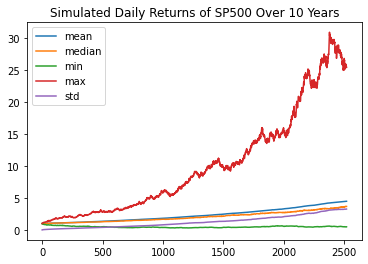

In [279]:
df_sp500_returns.plot(title="Simulated Daily Returns of SP500 Over 10 Years")

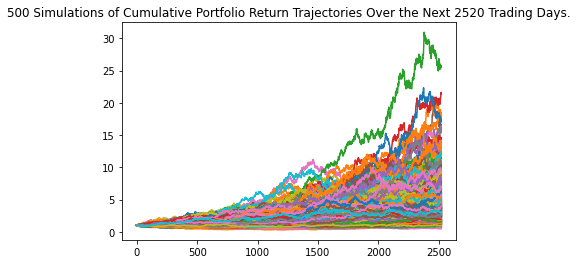

In [280]:
line_plot = MC_sp500.plot_simulation()

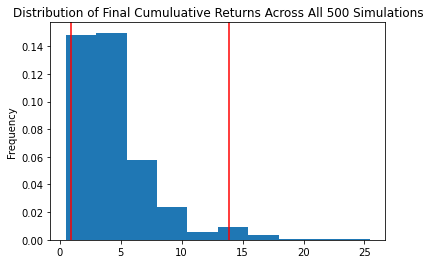

In [281]:
dist_plot = MC_sp500.plot_distribution()

In [282]:
sp500_table = MC_sp500.summarize_cumulative_return()

print(sp500_table)

count           500.000000
mean              4.483207
std               3.264201
min               0.485031
25%               2.446857
50%               3.674645
75%               5.536404
max              25.457418
95% CI Lower      0.889766
95% CI Upper     13.879102
Name: 2520, dtype: float64


In [283]:
SP500_lower = round(sp500_table[8]*10000,2)
SP500_upper = round(sp500_table[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${SP500_lower} and ${SP500_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $8897.66 and $138791.02.


<AxesSubplot:>

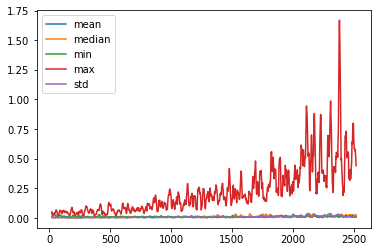

In [284]:
#Rolling Statistics
df_sp500_returns.rolling(window=21).std().plot()

# ESG Portfolios compared with SPY

In [285]:
# Combining ESG portfolios and SPY

combined_port = esg_closing_prices.merge(sp500_closing_prices, left_index=True, right_index=True)
combined_port

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
2017-05-04,58.0100,62.5400,106.5300,67.8000,29.8800,13.26,238.75
2017-05-05,58.0662,63.1826,107.2100,NaN,29.7400,13.42,239.72
2017-05-08,58.0694,62.7600,107.3400,68.9250,29.6000,13.28,239.67
2017-05-09,58.0800,62.5300,107.4299,67.9700,29.6200,13.26,239.46
2017-05-10,58.2400,62.6500,107.5000,67.9300,30.1000,13.24,239.85
...,...,...,...,...,...,...,...
2021-01-08,94.2000,75.7700,153.3400,80.3000,55.3800,25.97,381.24
2021-01-11,93.7300,74.8200,152.2499,79.4169,55.2001,25.47,378.74
2021-01-12,93.6500,75.1500,152.4160,79.5400,55.4300,25.03,378.81
2021-01-13,93.8300,75.0600,152.6800,79.4841,55.7180,25.10,379.76


In [286]:
combined_port.describe()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
count,930.000000,931.000000,929.000000,878.000000,927.000000,931.000000,932.000000
mean,70.554296,64.499527,119.227713,68.838281,37.704943,13.967938,288.271850
std,8.470279,4.182513,9.885544,4.651630,5.292035,2.372160,32.545228
min,55.585000,46.330000,89.440000,49.250000,28.604400,10.230000,222.510000
25%,64.670050,62.630000,113.070000,66.343000,34.011500,12.830000,265.520000
50%,68.895000,64.550000,117.950000,69.412500,36.809100,13.240000,282.765000
75%,75.235000,67.300000,122.948800,71.924525,40.605250,13.980000,306.385000
max,94.200000,75.770000,153.340000,80.300000,55.718000,26.015000,381.240000


<AxesSubplot:>

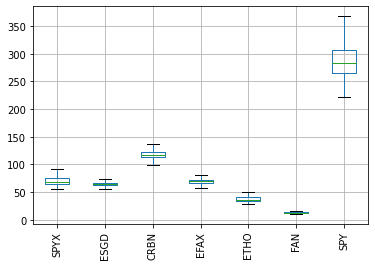

In [287]:
combined_port.boxplot(showfliers=False, rot=90)

In [288]:
#Combined Portfolio Daily Returns
combined_port_returns = (combined_port/combined_port.shift(1)) -1
combined_port_returns





,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,0.000969,0.010275,0.006383,NaN,-0.004685,0.012066,0.004063
2017-05-08,0.000055,-0.006689,0.001213,NaN,-0.004707,-0.010432,-0.000209
2017-05-09,0.000183,-0.003665,0.000838,-0.013856,0.000676,-0.001506,-0.000876
2017-05-10,0.002755,0.001919,0.000653,-0.000588,0.016205,-0.001508,0.001629
...,...,...,...,...,...,...,...
2021-01-08,0.003836,0.008384,0.007225,0.006518,0.002678,-0.001730,0.005751
2021-01-11,-0.004989,-0.012538,-0.007109,-0.010998,-0.003248,-0.019253,-0.006558
2021-01-12,-0.000854,0.004411,0.001091,0.001550,0.004165,-0.017275,0.000185
2021-01-13,0.001922,-0.001198,0.001732,-0.000703,0.005196,0.002797,0.002508


<AxesSubplot:>

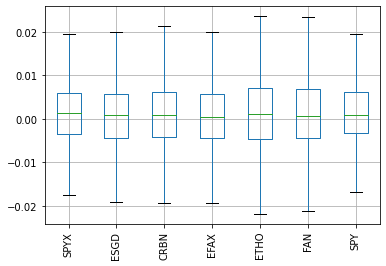

In [289]:
combined_port_returns.boxplot(showfliers=False, rot=90)

<AxesSubplot:>

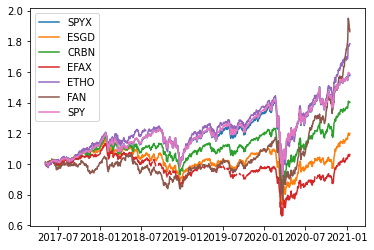

In [290]:
(combined_port_returns+1).cumprod().plot()

<AxesSubplot:>

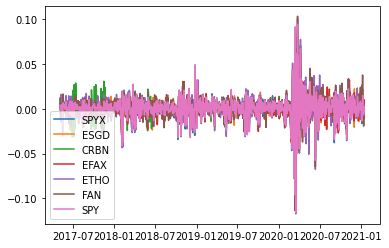

In [291]:
combined_port_returns.plot()

<AxesSubplot:>

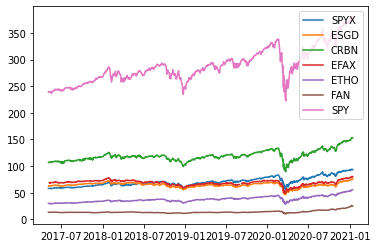

In [292]:
combined_port.plot()

In [293]:
combined_port_returns.iloc[-10:]

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
2020-12-31,0.007037,-0.008282,-0.001810,-0.007510,0.003406,-0.002995,0.005162
2021-01-04,-0.016233,0.006024,-0.004231,0.005387,-0.009612,0.026609,-0.013374
2021-01-05,0.005901,0.009254,0.009982,0.008802,0.006851,0.010242,0.006696
2021-01-06,0.005106,0.011866,0.003939,0.007840,0.021382,0.037865,0.005952
2021-01-07,0.014267,0.001333,0.012706,0.001004,0.022035,0.037281,0.014805
2021-01-08,0.003836,0.008384,0.007225,0.006518,0.002678,-0.001730,0.005751
2021-01-11,-0.004989,-0.012538,-0.007109,-0.010998,-0.003248,-0.019253,-0.006558
2021-01-12,-0.000854,0.004411,0.001091,0.001550,0.004165,-0.017275,0.000185
2021-01-13,0.001922,-0.001198,0.001732,-0.000703,0.005196,0.002797,0.002508
2021-01-14,-0.004156,0.007194,-0.001048,0.009862,-0.000144,-0.009960,-0.003450


In [294]:
combined_port_correlation = combined_port.corr()
combined_port_correlation

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
SPYX,1.000000,0.341686,0.927405,0.288700,0.990497,0.824338,0.998785
ESGD,0.341686,1.000000,0.661082,0.986711,0.376598,0.499445,0.370052
CRBN,0.927405,0.661082,1.000000,0.617740,0.934236,0.876981,0.936283
EFAX,0.288700,0.986711,0.617740,1.000000,0.317318,0.498978,0.313992
ETHO,0.990497,0.376598,0.934236,0.317318,1.000000,0.835373,0.992208
FAN,0.824338,0.499445,0.876981,0.498978,0.835373,1.000000,0.817804
SPY,0.998785,0.370052,0.936283,0.313992,0.992208,0.817804,1.000000


<AxesSubplot:>

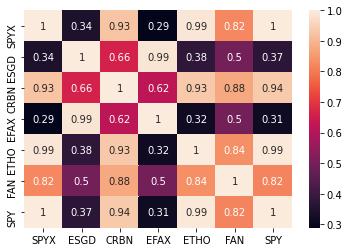

In [295]:
sb.heatmap(combined_port_correlation, annot=True)

<AxesSubplot:>

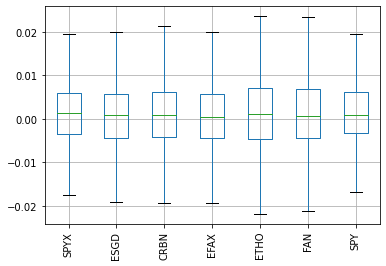

In [296]:
combined_port_returns.boxplot(showfliers=False, rot=90)

In [297]:
# Which portfolios are riskier than SP500
# esg_closing_prices.std()>sp500_closing_prices['SPY'].std()
combined_port_returns.std()>combined_port_returns['SPY'].std()

SPYX    False
ESGD    False
CRBN    False
EFAX    False
ETHO     True
FAN     False
SPY     False
dtype: bool

## Calculating Beta of ESG Funds to SPY

In [339]:
combined_port_returns.isnull().sum()

SPYX      5
ESGD      3
CRBN      6
EFAX    101
ETHO     11
FAN       3
SPY       1
dtype: int64

In [340]:
combined_port_returns = combined_port_returns.dropna().copy()
combined_port_returns.isnull().sum()

SPYX    0
ESGD    0
CRBN    0
EFAX    0
ETHO    0
FAN     0
SPY     0
dtype: int64

<AxesSubplot:>

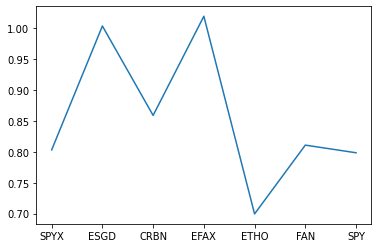

In [341]:
# Calculate Beta
covariance = combined_port_returns['SPY'].cov(combined_port_returns['FAN'])

variance = combined_port_returns.var()

beta = covariance/variance

beta.plot()

## Plotting Betas

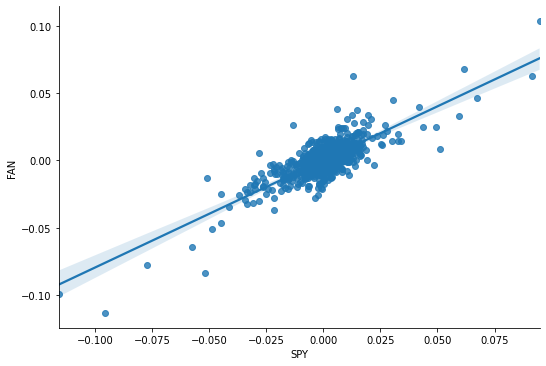

In [342]:
sb.lmplot(x='SPY', y='FAN', data=combined_port_returns, aspect=1.5, fit_reg=True)

In [374]:
(beta, alpha) = stats.linregress(combined_port_returns['SPY'].values,
                combined_port_returns['FAN'].values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha, 5))

The portfolio beta is 0.7984
The portfolio alpha is 0.00029


### FAN has a beta of 0.7984 showing that it's volatility is less than that of the SP500 with an average correlation
### FAN has an alpha of 0.00029 suggesting its return is commensurate with its risk and slightly better than that of the SP500

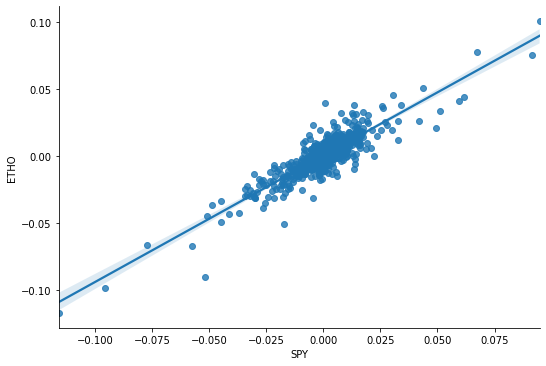

In [343]:
sb.lmplot(x='SPY', y='ETHO', data=combined_port_returns, aspect=1.5, fit_reg=True)

In [371]:
(beta, alpha) = stats.linregress(combined_port_returns['SPY'].values,
                combined_port_returns['ETHO'].values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha, 5))

The portfolio beta is 0.945
The portfolio alpha is 0.00031


### ETHO has a beta of .945 showing that it's volatility is close but slightly less than that of the SP500 and ETHO is correlated with the SP500
### ETHO has an alpha of .00031 suggesting its return is commensurate with its risk and performs slightly better than the SP500

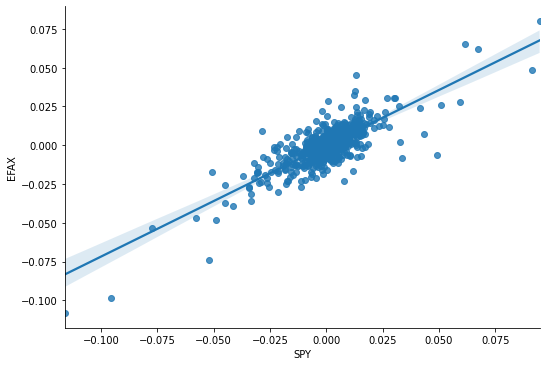

In [344]:
sb.lmplot(x='SPY', y='EFAX', data=combined_port_returns, aspect=1.5, fit_reg=True)

In [367]:
(beta, alpha) = stats.linregress(combined_port_returns['SPY'].values,
                combined_port_returns['EFAX'].values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha, 5))

The portfolio beta is 0.7161
The portfolio alpha is -0.00022


### EFAX has a beta of .7161 showing it to be about 30% less volatile than the SP500 with an loose correlation
### EFAX has an alpha of -0.00022 showing to slighly underperform the SP500

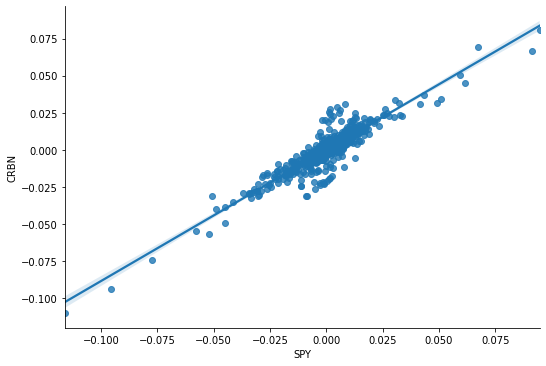

In [345]:
sb.lmplot(x='SPY', y='CRBN', data=combined_port_returns, aspect=1.5, fit_reg=True)

In [366]:
(beta, alpha) = stats.linregress(combined_port_returns['SPY'].values,
                combined_port_returns['CRBN'].values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha, 5))

The portfolio beta is 0.8845
The portfolio alpha is -0.0001


### CRBN has a beta of .8845 showing to be 12% less volatile than the SP500 with a strong correlation to the SP500
### CRBN has an alpha of -0.0001 indicating a slight underperformance to the SP500

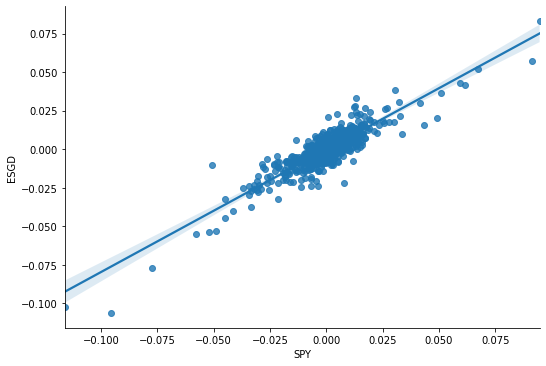

In [346]:
sb.lmplot(x='SPY', y='ESGD', data=combined_port_returns, aspect=1.5, fit_reg=True)

In [365]:
(beta, alpha) = stats.linregress(combined_port_returns['SPY'].values,
                combined_port_returns['ESGD'].values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha, 5))

The portfolio beta is 0.7943
The portfolio alpha is -0.00023


### ESGD has a beta of 0.7943 showing it to be about 20% less volatile than the SP500 with a fairly strong correlation to the SP500
### ESGD has an alhpa of -0.00023 indicating a slight underperformance to the SP500

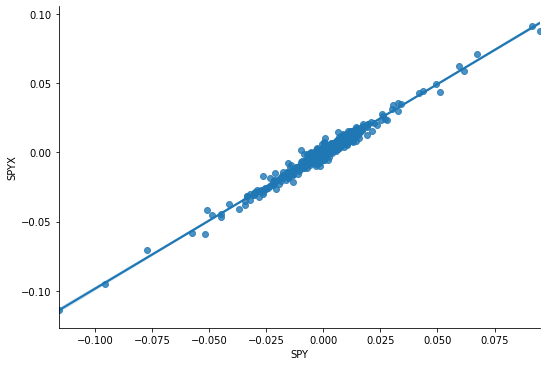

In [347]:
sb.lmplot(x='SPY', y='SPYX', data=combined_port_returns, aspect=1.5, fit_reg=True)

In [364]:
(beta, alpha) = stats.linregress(combined_port_returns['SPY'].values,
                combined_port_returns['SPYX'].values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha, 5))

The portfolio beta is 0.9837
The portfolio alpha is 4e-05


### SPYX has a beta of 0.9837 showing it have similar volatility to the SP500 and a strong correlation with the SP500
### SPYX has an alpha of 0.00004 indicating a similar performance to the SP500